# To use sql_magic:
* Must use spark version > 2.0.0 

In [31]:
import sys, os

In [32]:
# Print path to make sure we are in right place
print sys.executable
# Try to load sql_magic right away - early detect errors
%load_ext sql_magic

/home/tnystrand/anaconda2/envs/py27/bin/python
The sql_magic extension is already loaded. To reload it, use:
  %reload_ext sql_magic


In [41]:
# Make sure SPARK_HOME points correctly (note, there are a bunch of other environmental variables that needs to be set)
os.putenv('SPARK_HOME', '/opt/alti-spark-2.1.1/')
!echo $SPARK_HOME
!echo $SPARK_CONF_DIR
!echo $PYSPARK_PYTHON
!echo $PYSPARK_DRIVER_PYTHON
!echo $PYSPARK_SUBMIT_ARGS

/opt/alti-spark-2.1.1/






In [33]:
# The 00-startup script for pyspark
spark_home = os.environ.get('SPARK_HOME', None)
sys.path.insert(0, os.path.join(spark_home, 'python'))
sys.path.insert(0, os.path.join(spark_home, 'python/lib/py4j-0.10.4-src.zip'))
execfile(os.path.join(spark_home, 'python/pyspark/shell.py'))

# We should have a spark session available
print spark

/opt/alti-spark-2.1.1/
Welcome to
      ____              __
     / __/__  ___ _____/ /__
    _\ \/ _ \/ _ `/ __/  '_/
   /__ / .__/\_,_/_/ /_/\_\   version 2.1.1
      /_/

Using Python version 2.7.12 (default, Jul  2 2016 17:42:40)
SparkSession available as 'spark'.


In [34]:
# Set the connection name
%config SQL.conn_name = 'spark'

In [35]:
%%read_sql
use cluster_metrics_prod_2

Query started at 02:12:50 PM UTC; Query executed in 0.00 m

In [36]:
%%read_sql -a df_burst
select count(*) as counts, partition_date from burst_time_series_patchjoin where partition_date>'2017-09-01' group by partition_date

Query started at 02:12:50 PM UTC

In [37]:
%read_sql show databases

Query started at 02:12:50 PM UTC; Query executed in 0.02 m

,databaseName
0,ae1634
1,alee_test
2,alti_bala
3,alti_demo
4,alti_maint_test
5,alti_reports
6,alti_sadhana
7,ara
8,as_adventure
9,atscale


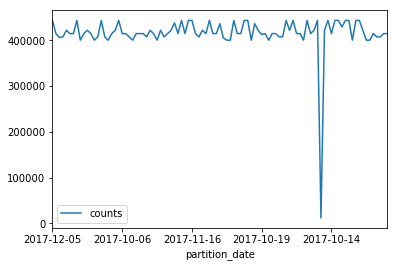

In [49]:
%matplotlib inline
df_burst.plot('partition_date', 'counts', kind='line')

In [45]:
%matplotlib --list

Available matplotlib backends: ['osx', 'qt4', 'qt5', 'gtk3', 'notebook', 'wx', 'qt', 'nbagg', 'gtk', 'tk', 'inline']
